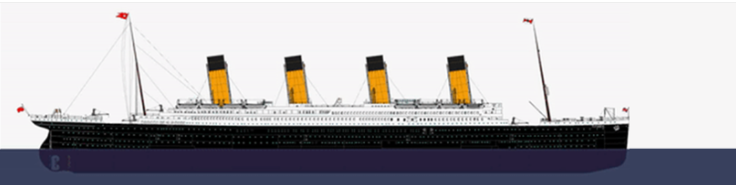
# 타이타닉 데이터를 활용한 데이터 분석

- 타이타닉은 역사상 가장 유명한 난파선 중 하나입니다. 1912년 4월 15일, 타이타닉은 항해중 빙산과의 충돌로 인해 침몰합니다. 탑승인원 2224명 중 1502명이 사망한 비극적인 사건이었고, 선박의 안전규정을 개선시키는 계기가 되었습니다.

- 이 과제에서는 여러분은 어떤 종류의 사람들이 많이 살아남았는지에 대한 분석을 해야 합니다. 그리고 머신러닝을 이용해 어떤 승객이 생존했을지 예측해보세요. 

`자료 출처`:https://dacon.io/competitions/open/235539/overview/description



# 라이브러리 및 데이터 수집

In [1]:
import pandas as pd
import numpy as np
import re as re

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv ") 

- SibSp : 동반한 형제, 자매, 배우자 수
- Parch : 동반한 부모, 자식 수
- Cabin : 객실 번호
- Embarked : 승선한 항구명

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.shape, test.shape, sample_submission.shape

((891, 12), (418, 11), (418, 2))

# 데이터 전처리
- SibSp외 Parch로 새로운 변수 FamilySize 생성하기
- 혼자 탑승했는지 여부를 알려줄 변수 alone 생성하기
- Embarked의 결측치를 빈도가 가장 많은 'S'로 대체하기
- Fare의 결측치를 중위값으로 대체하기
- Age는 정규분포를 통하여 결측값을 처리하기
- Name에서 호칭 추출하기
- 적은 수의 호칭은 'Rare'로 대체합
- 성별을 숫자형으로 변환
- 호칭을 숫자형으로 변환
- Embarked를 숫자형으로 변환
- Fare를 범주형으로 변환
- Age를 범주형으로 변환

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#SibSp외 Parch로 새로운 변수 FamilySize 생성하기
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [10]:
#혼자 탑승했는지 여부를 알려줄 변수 alone 생성하기
train['alone']=0
train.loc[train['FamilySize']==1,'alone']=1
test['alone']=0
test.loc[test['FamilySize']==1,'alone']=1

In [11]:
#Embarked의 결측치를 빈도가 가장 많은 'S'로 대체하기
train['Embarked']=train['Embarked'].fillna('S')
test['Embarked']=test['Embarked'].fillna('S')

In [12]:
#Fare의 결측치를 중위값으로 대체하기

train['Fare']=train['Fare'].fillna(train['Fare'].median())
test["Fare"]=test['Fare'].fillna(test['Fare'].median())

In [13]:
# Age는 정규분포를 통하여 결측값을 처리하기

age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)

age_avg = test['Age'].mean()
age_std = test['Age'].std()
age_null_count = test['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
test['Age'][np.isnan(test['Age'])] = age_null_random_list
test['Age'] = test['Age'].astype(int)

<ipython-input-13-42585af06d2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])] = age_null_random_list
<ipython-input-13-42585af06d2f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][np.isnan(test['Age'])] = age_null_random_list


In [14]:
# Name에서 호칭 추출하기
train['Name']=train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
test['Name']=test['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [15]:
# 적은 수의 호칭은 'Rare'로 대체합
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Don           1
Sir           1
Ms            1
Mme           1
Lady          1
Capt          1
Countess      1
Name: Name, dtype: int64

In [16]:
train['Name'] = train['Name'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Name'] = train['Name'].replace('Mlle', 'Miss')
train['Name'] = train['Name'].replace('Ms', 'Miss')
train['Name'] = train['Name'].replace('Mme', 'Mrs')

test['Name'] = test['Name'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Name'] = test['Name'].replace('Mlle', 'Miss')
test['Name'] = test['Name'].replace('Ms', 'Miss')
test['Name'] = test['Name'].replace('Mme', 'Mrs')

In [17]:
train['Name'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Name, dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  alone        891 non-null    int64  
dtypes: float64(1), int32(1), int64(7), object(5)
memory usage: 94.1+ KB


In [19]:
# 성별을 숫자형으로 변환
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [20]:
train['Sex']=train['Sex'].map({'female':0,'male':1}).astype(int)
test['Sex']=test['Sex'].map({'female':0,'male':1}).astype(int)

In [21]:
# 호칭을 숫자형으로 변환
train["Name"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [22]:
train["Name"]=train["Name"].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype(int)
test["Name"]=test["Name"].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype(int)

In [23]:
# Embarked를 숫자형으로 변환

train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
train['Embarked']=train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test['Embarked']=test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [25]:
# Fare를 범주형으로 변환
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
train.loc[train['Fare']<=7.910400,'Fare']=0
train.loc[train['Fare']<=14.454200,'Fare']=1
train.loc[train['Fare']<=31.000000,'Fare']=2
train.loc[train['Fare']<=512.3292,'Fare']=3
train['Fare']=train['Fare'].astype(int)
train['Fare']

0      3
1      3
2      3
3      3
4      3
      ..
886    3
887    3
888    3
889    3
890    3
Name: Fare, Length: 891, dtype: int32

In [27]:
test.loc[test['Fare']<=7.910400,'Fare']=0
test.loc[test['Fare']<=14.454200,'Fare']=1
test.loc[test['Fare']<=31.000000,'Fare']=2
test.loc[test['Fare']<=512.3292,'Fare']=3
test['Fare']=test['Fare'].astype(int)
test['Fare']

0      3
1      3
2      3
3      3
4      3
      ..
413    3
414    3
415    3
416    3
417    3
Name: Fare, Length: 418, dtype: int32

# 변수 선택 및 모델 구축

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,alone
0,1,0,3,1,1,22,1,0,A/5 21171,3,NaN,0,2,0
1,2,1,1,3,0,38,1,0,PC 17599,3,C85,1,2,0
2,3,1,3,2,0,26,0,0,STON/O2. 3101282,3,NaN,0,1,1
3,4,1,1,3,0,35,1,0,113803,3,C123,0,2,0
4,5,0,3,1,1,35,0,0,373450,3,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,5,1,27,0,0,211536,3,NaN,0,1,1
887,888,1,1,2,0,19,0,0,112053,3,B42,0,1,1
888,889,0,3,2,0,21,1,2,W./C. 6607,3,NaN,0,4,0
889,890,1,1,1,1,26,0,0,111369,3,C148,1,1,1


In [34]:
train=train.drop(["PassengerId","Ticket","Cabin"],axis=1)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,alone
0,0,3,1,1,22,1,0,3,0,2,0
1,1,1,3,0,38,1,0,3,1,2,0
2,1,3,2,0,26,0,0,3,0,1,1
3,1,1,3,0,35,1,0,3,0,2,0
4,0,3,1,1,35,0,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,5,1,27,0,0,3,0,1,1
887,1,1,2,0,19,0,0,3,0,1,1
888,0,3,2,0,21,1,2,3,0,4,0
889,1,1,1,1,26,0,0,3,1,1,1


In [35]:
test=test.drop(["PassengerId","Ticket","Cabin"],axis=1)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,alone
0,3,1,1,34,0,0,3,2,1,1
1,3,3,0,47,1,0,3,0,2,0
2,2,1,1,62,0,0,3,2,1,1
3,3,1,1,27,0,0,3,0,1,1
4,3,3,0,22,1,1,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,25,0,0,3,0,1,1
414,1,5,0,39,0,0,3,1,1,1
415,3,1,1,38,0,0,3,0,1,1
416,3,1,1,32,0,0,3,0,1,1
